In [56]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.utils._testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning

In [57]:
df = pd.read_csv('')

Text(0.5, 1.0, 'Correlation Heatmap')

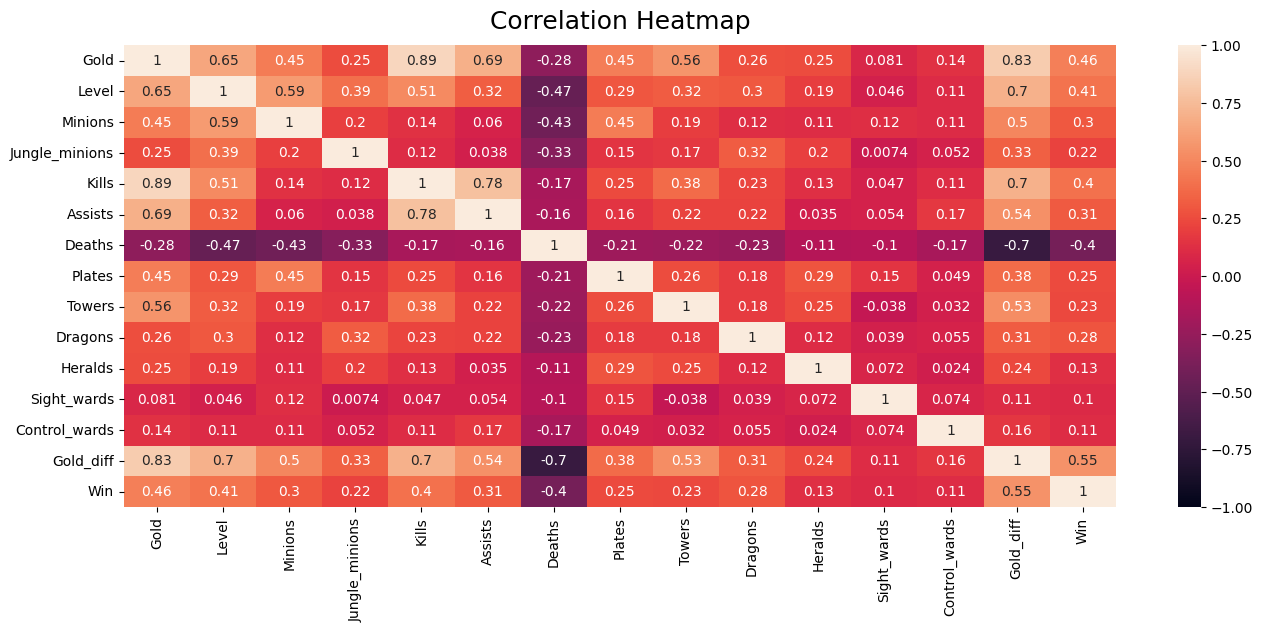

In [58]:
#Generate correlation matrix in orther to see most important values
corr = df.corr()
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

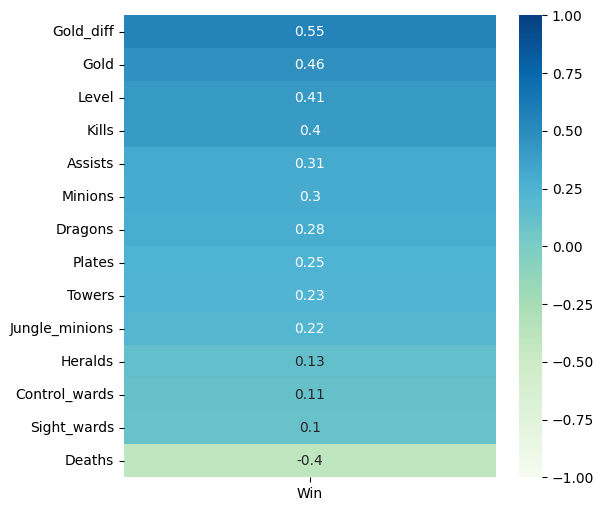

In [59]:
#Generate correlation matrix only of win column
fig, ax = plt.subplots(figsize=((6, 6)))
sns.heatmap(corr["Win"].sort_values(ascending=False).drop("Win").to_frame(), vmin=-1, vmax=1, annot=True,cmap="GnBu")
plt.show()

In [60]:
@ignore_warnings(category=ConvergenceWarning)
def evaluate_model(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    # Get Predictions
    y_hat_test = model.predict(X_test)
    y_hat_train = model.predict(X_train)

    # Classification Report / Scores
    print("****CLASSIFICATION REPORT - TRAINING DATA****")
    print(classification_report(y_train, y_hat_train, digits=digits))

    print("****CLASSIFICATION REPORT - TEST DATA****")
    print(classification_report(y_test, y_hat_test, digits=digits))

    print("****CONFUSION MATRIX****")
    fig, axes = plt.subplots(ncols=1, figsize=figsize)

    # Confusion Matrix
    disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, normalize='true', cmap='Purples', ax=axes)
    disp.ax_.set_title('Confusion Matrix')

    if params == True:
        print("****MODEL PARAMETERS****")
        params = pd.DataFrame(pd.Series(model.get_params()))
        params.columns=['parameters']
        display(params)

def fit_eval(model, X_train, y_train, X_test, y_test, digits=4, figsize=(10,5), params=False):
    model.fit(X_train, y_train)

    evaluate_model(model, X_train, y_train, X_test, y_test, digits=digits, figsize=figsize, params=params)

    return model


In [61]:
#We will first set the complete DataFrames
x_keep_original = ['Level', 'Minions', 'Jungle_minions', 'Kills', 'Assists', 'Deaths', 'Plates', 'Towers', 'Dragons', 'Heralds', 'Sight_wards', 'Control_wards', 'Gold_diff']
X_original = df[x_keep_original]
y_original = df["Win"]

In [62]:
#Do the split for both the orginal and reduced DataFrames
X_train_original, X_test_original, y_train_original, y_test_original = train_test_split(X_original, y_original, test_size=0.333, random_state=42)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     0.7899    0.8103    0.8000       116
           1     0.8087    0.7881    0.7983       118

    accuracy                         0.7991       234
   macro avg     0.7993    0.7992    0.7991       234
weighted avg     0.7994    0.7991    0.7991       234

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7313    0.8167    0.7717        60
           1     0.7843    0.6897    0.7339        58

    accuracy                         0.7542       118
   macro avg     0.7578    0.7532    0.7528       118
weighted avg     0.7574    0.7542    0.7531       118

****CONFUSION MATRIX****


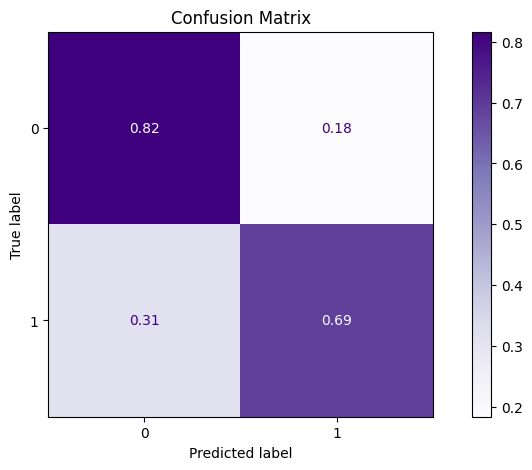

In [63]:
#Logisitc regression using the original df
log_select = fit_eval(LogisticRegression(max_iter=1000), X_train_original, y_train_original, X_test_original, y_test_original)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       116
           1     1.0000    1.0000    1.0000       118

    accuracy                         1.0000       234
   macro avg     1.0000    1.0000    1.0000       234
weighted avg     1.0000    1.0000    1.0000       234

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7097    0.7333    0.7213        60
           1     0.7143    0.6897    0.7018        58

    accuracy                         0.7119       118
   macro avg     0.7120    0.7115    0.7115       118
weighted avg     0.7119    0.7119    0.7117       118

****CONFUSION MATRIX****


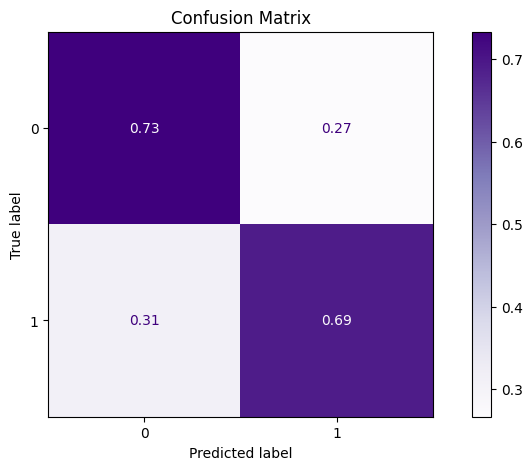

In [64]:
#Decision Tree using the original df
log_select = fit_eval(DecisionTreeClassifier(), X_train_original, y_train_original, X_test_original, y_test_original)

****CLASSIFICATION REPORT - TRAINING DATA****
              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000       116
           1     1.0000    1.0000    1.0000       118

    accuracy                         1.0000       234
   macro avg     1.0000    1.0000    1.0000       234
weighted avg     1.0000    1.0000    1.0000       234

****CLASSIFICATION REPORT - TEST DATA****
              precision    recall  f1-score   support

           0     0.7206    0.8167    0.7656        60
           1     0.7800    0.6724    0.7222        58

    accuracy                         0.7458       118
   macro avg     0.7503    0.7445    0.7439       118
weighted avg     0.7498    0.7458    0.7443       118

****CONFUSION MATRIX****


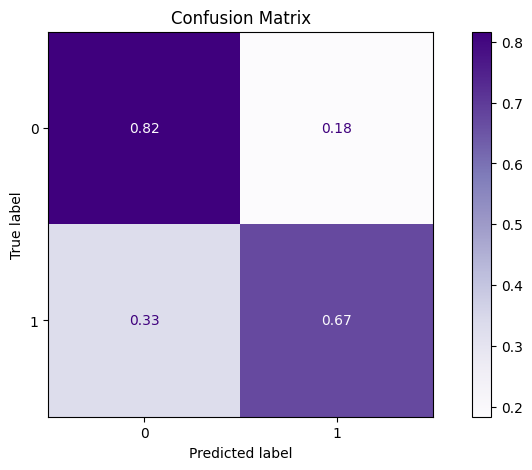

In [65]:
#Random Forest using the original df
log_select = fit_eval(RandomForestClassifier(), X_train_original, y_train_original, X_test_original, y_test_original)